103
Columns in combined_data: ['Sample_ID', 'hsa-miR-28-3p', 'hsa-miR-27a-5p', 'hsa-miR-518b', 'hsa-miR-520b', 'hsa-miR-498', 'hsa-miR-512-3p', 'hsa-miR-491-5p', 'hsa-miR-490-3p', 'hsa-miR-452-5p', 'hsa-miR-451a', 'hsa-miR-1302', 'hsa-miR-548l', 'hsa-miR-1208', 'hsa-miR-1207-3p', 'hsa-miR-124-5p', 'hsa-miR-122-3p', 'hsa-miR-199a-3p, hsa-miR-199b-3p', 'hsa-miR-196a-3p', 'hsa-miR-16-2-3p', 'hsa-miR-106a-3p', 'hsa-miR-4281', 'hsa-miR-4271', 'hsa-miR-3130-3p', 'hsa-miR-4285', 'hsa-miR-2277-3p', 'hsa-miR-2276-3p', 'hsa-miR-1270', 'hsa-miR-1269a', 'hsa-miR-1255a', 'hsa-miR-1254', 'hsa-miR-4424', 'hsa-miR-4785', 'hsa-miR-4680-5p', 'hsa-miR-3124-3p', 'hsa-miR-4722-3p', 'hsa-miR-3140-5p', 'hsa-miR-4709-5p', 'hsa-miR-3973', 'hsa-miR-3186-3p', 'hsa-miR-3065-5p', 'hsa-miR-4483', 'hsa-miR-4525', 'hsa-miR-5194', 'hsa-miR-5193', 'hsa-miR-5087', 'hsa-miR-5011-3p', 'hsa-miR-4501', 'hsa-miR-4802-5p', 'hsa-miR-4802-3p', 'hsa-miR-4801', 'hsa-miR-4715-3p', 'hsa-miR-4658', 'hsa-miR-329-5p', 'hsa-miR-433-5p'

<Figure size 1500x1000 with 0 Axes>

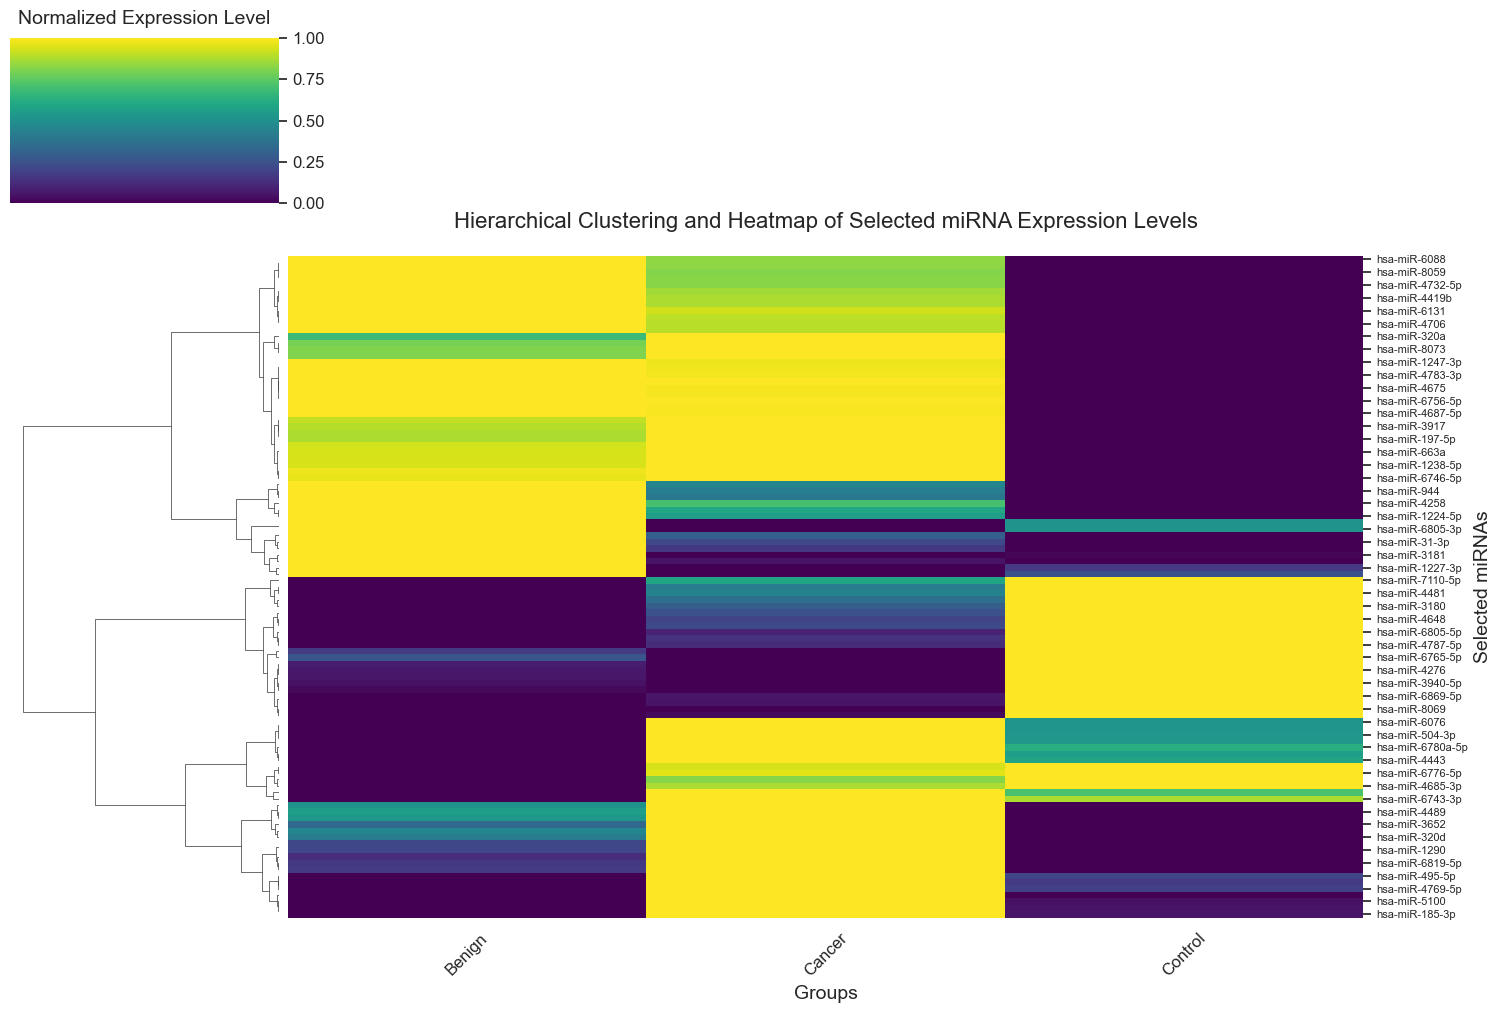

Sampled miRNAs from each cluster: ['hsa-miR-4787-3p', 'hsa-miR-3181', 'hsa-miR-3940-5p', 'hsa-miR-4754']
'hsa-miR-4734' was not sampled from the clusters. Including it manually.
ANOVA result for hsa-miR-4787-3p: F=4973.02494888387, p=0.0
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Benign  Cancer  -0.0515   0.0  -0.066  -0.037   True
Benign Control  -0.3051   0.0 -0.3185 -0.2917   True
Cancer Control  -0.2536   0.0 -0.2604 -0.2469   True
----------------------------------------------------


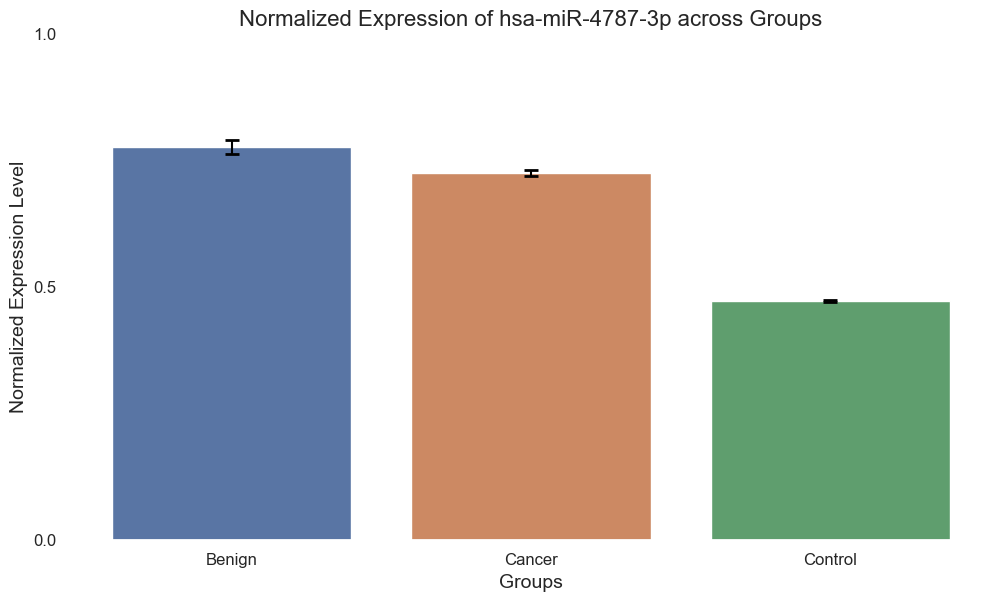

ANOVA result for hsa-miR-3181: F=141.82615240961158, p=4.3509724403272885e-61
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Benign  Cancer  -0.1787   0.0 -0.2096 -0.1478   True
Benign Control  -0.0899   0.0 -0.1183 -0.0614   True
Cancer Control   0.0888   0.0  0.0745  0.1032   True
----------------------------------------------------


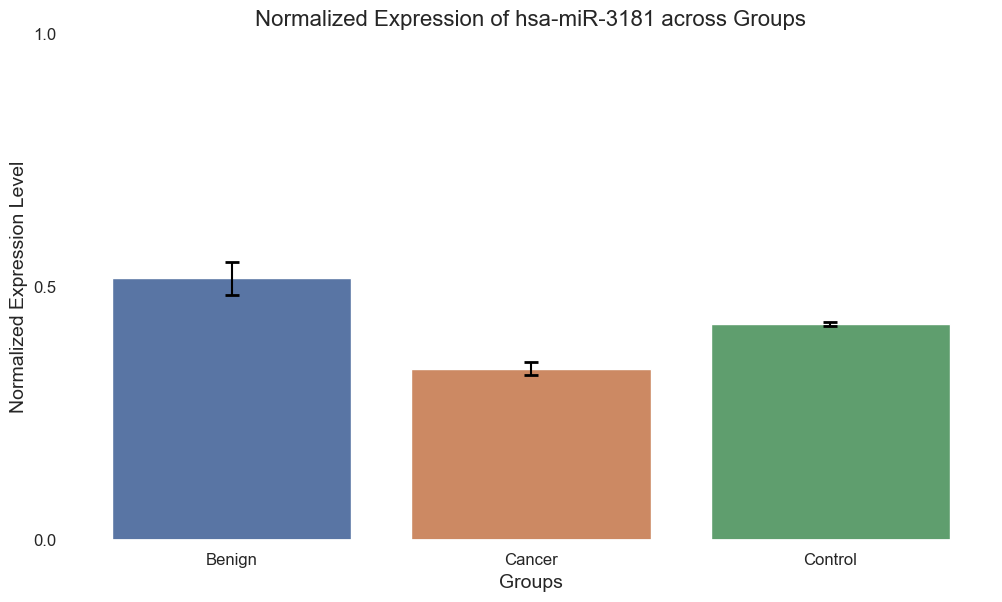

ANOVA result for hsa-miR-3940-5p: F=1592.9353080730934, p=0.0
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
Benign  Cancer   0.0642   0.0 0.0507 0.0778   True
Benign Control   0.1893   0.0 0.1768 0.2018   True
Cancer Control   0.1251   0.0 0.1188 0.1314   True
--------------------------------------------------


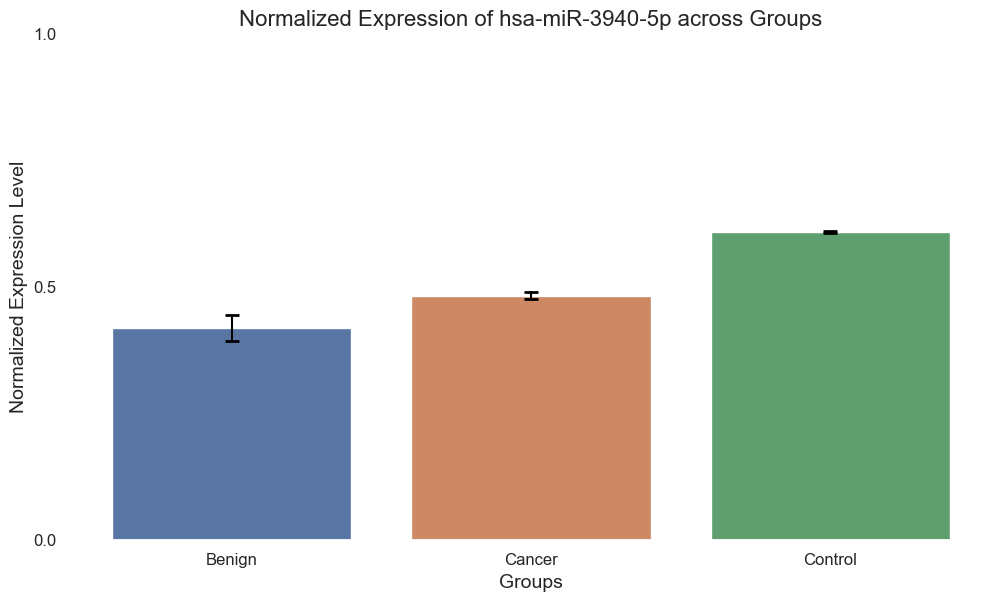

ANOVA result for hsa-miR-4754: F=290.6911465092484, p=6.223941491943714e-122
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj lower   upper  reject
---------------------------------------------------
Benign  Cancer   0.2236   0.0 0.1906  0.2565   True
Benign Control   0.0739   0.0 0.0435  0.1043   True
Cancer Control  -0.1497   0.0 -0.165 -0.1344   True
---------------------------------------------------


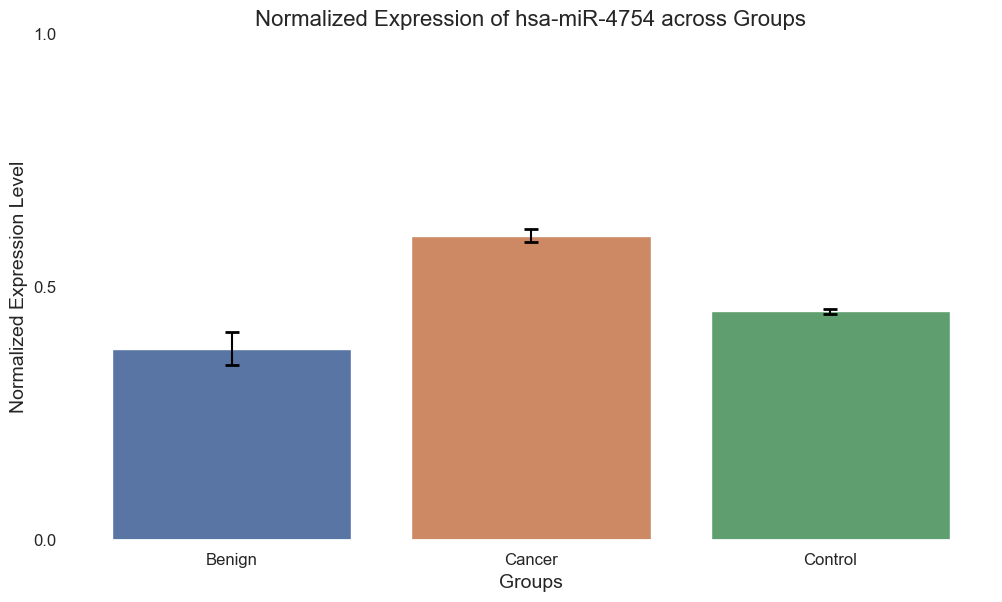

ANOVA result for hsa-miR-4734: F=27.646765806279067, p=1.0990972516495693e-12
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Benign  Cancer  -0.0569    0.0  -0.075 -0.0387   True
Benign Control  -0.0426    0.0 -0.0593 -0.0258   True
Cancer Control   0.0143 0.0002  0.0059  0.0228   True
-----------------------------------------------------


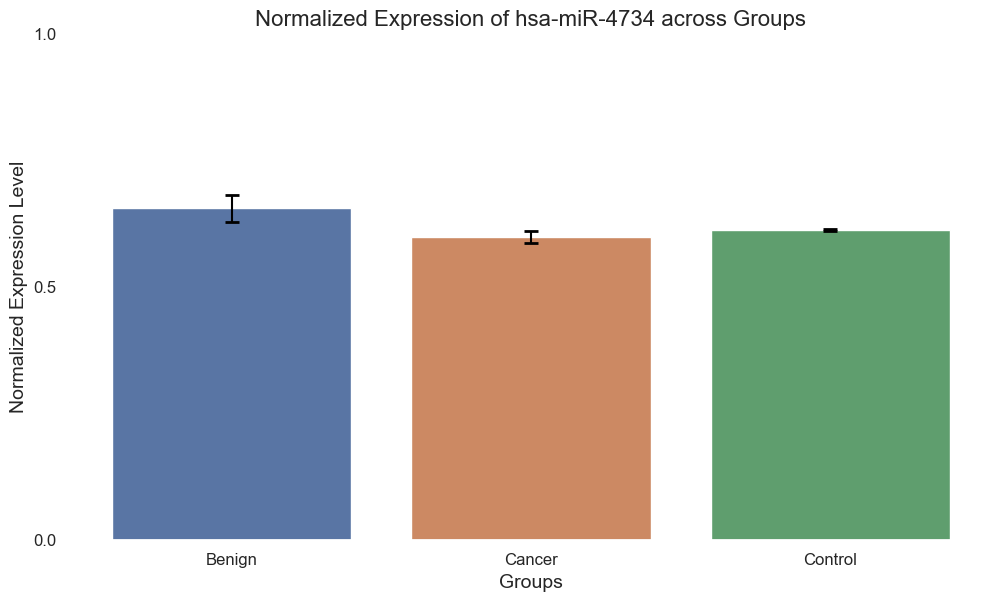

In [5]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the feature files and combine the features
features_ctl_b = pd.read_csv('../GSEA/miRNA/50_ctl_b.csv')['Feature'].tolist()
features_ctl_c = pd.read_csv('../GSEA/miRNA/50_ctl_c.csv')['Feature'].tolist()
features_b_c = pd.read_csv('../GSEA/miRNA/50_b_c.csv')['Feature'].tolist()

all_selected_features = list(set(features_ctl_b + features_ctl_c + features_b_c))

print(len(all_selected_features))  # Ensure the total number of unique features

# Load and prepare the original data
control_samples = pd.read_csv('../data/control/control_samples.csv')
benign_samples = pd.read_csv('../data/benign/benign_prostate_samples.csv')
cancer_samples = pd.read_csv('../data/cancer/prostate_cancer_samples.csv')

# Add group column for easier concatenation
control_samples['Group'] = 'Control'
benign_samples['Group'] = 'Benign'
cancer_samples['Group'] = 'Cancer'

# Combine all group data
combined_data = pd.concat([control_samples, benign_samples, cancer_samples], ignore_index=True)

# Debug: Print columns of combined_data
print("Columns in combined_data:", combined_data.columns.tolist())
print('hsa-miR-4734' in combined_data.columns)

# Ensure only numeric columns are used
numeric_columns = combined_data.select_dtypes(include='number').columns

# Debug: Print numeric columns
print("Numeric columns before dropping:", numeric_columns.tolist())

# Drop the non-numeric columns if they exist in numeric_columns
columns_to_drop = ['Sample_ID', 'Sex', 'Age']
numeric_columns = [col for col in numeric_columns if col not in columns_to_drop]

# Debug: Print numeric columns after dropping
print("Numeric columns after dropping:", numeric_columns)

# Calculate the average expression levels for each miRNA for each group
average_expression = combined_data.groupby('Group')[numeric_columns].mean().T

# Ensure all selected features are present in the data
selected_features_in_data = [feature for feature in all_selected_features if feature in average_expression.index]

print("Features present in data:", len(selected_features_in_data))

# Print missing features
missing_features = set(all_selected_features) - set(selected_features_in_data)
if missing_features:
    print("Missing features:", missing_features)

# Extract the selected features from the average expression data
selected_expression = average_expression.loc[selected_features_in_data]

# Normalize each miRNA across groups
normalized_expression = selected_expression.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Check if the normalization removes any miRNAs
print("Normalized expression shape:", normalized_expression.shape)

# Perform hierarchical clustering on the normalized data
linked = linkage(normalized_expression, method='ward')

# Create a heatmap with dendrogram
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)  # Reduce font scale for better visibility
clustermap = sns.clustermap(normalized_expression, row_linkage=linked, col_cluster=False, cmap='viridis', figsize=(15, 10))

# Enhance the heatmap
clustermap.ax_heatmap.set_title('Hierarchical Clustering and Heatmap of Selected miRNA Expression Levels', fontsize=16, pad=20)
clustermap.ax_heatmap.set_xlabel('Groups', fontsize=14)
clustermap.ax_heatmap.set_ylabel('Selected miRNAs', fontsize=14)
clustermap.ax_heatmap.tick_params(axis='x', rotation=45, labelsize=12)

# Set y-tick labels to ensure all miRNAs are displayed
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)  # Adjust fontsize for y-tick labels

# Add color bar legend with a title
cbar = clustermap.ax_heatmap.collections[0].colorbar
# cbar.set_label('Normalized Expression Level', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set color bar title
cbar.ax.set_title('Normalized Expression Level', fontsize=14, pad=10)

plt.tight_layout()

# Save the figure
# plt.savefig('../output/heatmap_clustering_normalized_all_features.png')
plt.show()

# For each of the 7 different groups from hierarchical clustering, choose one miRNA and perform analysis on it to give a sample from that group
num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Sample one miRNA from each cluster
sampled_miRNAs = []
for cluster_id in range(1, num_clusters + 1):
    cluster_miRNAs = normalized_expression.index[clusters == cluster_id]
    sampled_miRNA = cluster_miRNAs[0]  # Select the first miRNA in the cluster
    sampled_miRNAs.append(sampled_miRNA)

print("Sampled miRNAs from each cluster:", sampled_miRNAs)

# Check if 'hsa-miR-4734' is in the sampled miRNAs
if 'hsa-miR-4734' not in sampled_miRNAs:
    print("'hsa-miR-4734' was not sampled from the clusters. Including it manually.")
    sampled_miRNAs.append('hsa-miR-4734')

# Perform ANOVA and Post Hoc analysis on normalized data
for miRNA in sampled_miRNAs:
    miRNA_data = combined_data[['Group', miRNA]]
    miRNA_data = miRNA_data.dropna()

    # Normalize within each miRNA across all groups
    miRNA_data['Normalized'] = miRNA_data.groupby('Group')[miRNA].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

    # ANOVA on normalized data
    anova_result = f_oneway(
        miRNA_data[miRNA_data['Group'] == 'Control']['Normalized'],
        miRNA_data[miRNA_data['Group'] == 'Benign']['Normalized'],
        miRNA_data[miRNA_data['Group'] == 'Cancer']['Normalized']
    )

    print(f"ANOVA result for {miRNA}: F={anova_result.statistic}, p={anova_result.pvalue}")

    # Post Hoc Analysis with Tukey HSD on normalized data
    tukey_result = pairwise_tukeyhsd(endog=miRNA_data['Normalized'], groups=miRNA_data['Group'], alpha=0.05)
    print(tukey_result)

    mean_data = miRNA_data.groupby('Group')['Normalized'].mean().reset_index()
    sem_data = miRNA_data.groupby('Group')['Normalized'].sem().reset_index()
    mean_data['2*SEM'] = 2 * sem_data['Normalized']

    # Plot normalized expression over groups using bar plot
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('white')
    bar_plot = sns.barplot(x='Group', y='Normalized', data=mean_data)
    
    # Add error bars with horizontal caps
    for i, group in enumerate(mean_data['Group']):
        plt.errorbar(x=i, y=mean_data.loc[i, 'Normalized'], yerr=mean_data.loc[i, '2*SEM'], fmt='none', c='black', capsize=5, capthick=2)

    plt.title(f'Normalized Expression of {miRNA} across Groups', fontsize=16)
    plt.xlabel('Groups', fontsize=14)
    plt.ylabel('Normalized Expression Level', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks([0, 0.5, 1], fontsize=12)
    plt.tight_layout()
    # plt.savefig(f'../output/barplot_{miRNA}.png')
    plt.show()